## Introduction



In this mainly we will look at data exploration and visulisation part

EDA is often most tedious and boring job.

But the more time you spend here on understanding, cleaning and preparing data the better fruits your predictive model will bare!!

Lets start.

1) **Introduction**

  1. Import Libraries
  2. Load data
  3. Variable Identification
  4. Run Statistical summaries
  5. Correlation with target variable

 
2) **Missing values imputation**

  1. Figure out missing value columns
  2. Fill out missing values


3) **Visualisations**

 1. Univariate Analysis
 2. Bivariate Analysis

**Import libraries**
====================

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

UsageError: Line magic function `%` not found.


**Load the dataset**
=========================================================================================

To download the dataset<a href="https://drive.google.com/drive/folders/107onHttRI2U6ROFS86uC5idFb_UHaxxk?usp=sharing" title="Google Drive"> Click here</a>

In [3]:
houses=pd.read_csv("Visualisation_11.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houses_test = pd.read_csv("Visualisation_11.csv")
#transpose
houses_test.head()
#note their is no "SalePrice" column here which is our target varible.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
#(rows,columns)
houses.shape

(1460, 81)

There are total **1460 samples** which we can use to train model and **80 features** and **1 target variable.**

In [6]:
houses_test.shape
#1 column less because target variable isn't there in test set!

(1460, 81)

*Variable Identification*
-----------------------

In [7]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
#How many columns with different datatypes are there?
houses.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [9]:
##Describe gives statistical information about numerical columns in the dataset
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Correlation in Data**
====================

In [10]:
corr=houses.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

OverallQual ,GrLivArea ,GarageCars,GarageArea ,TotalBsmtSF, 1stFlrSF     ,FullBath,TotRmsAbvGrd,YearBuilt, YearRemodAdd have more than 0.5 correlation with SalePrice. 

EnclosedPorch and KitchenAbvGr  have little negative correlation with target variable.

These can prove to be important features to predict SalePrice.


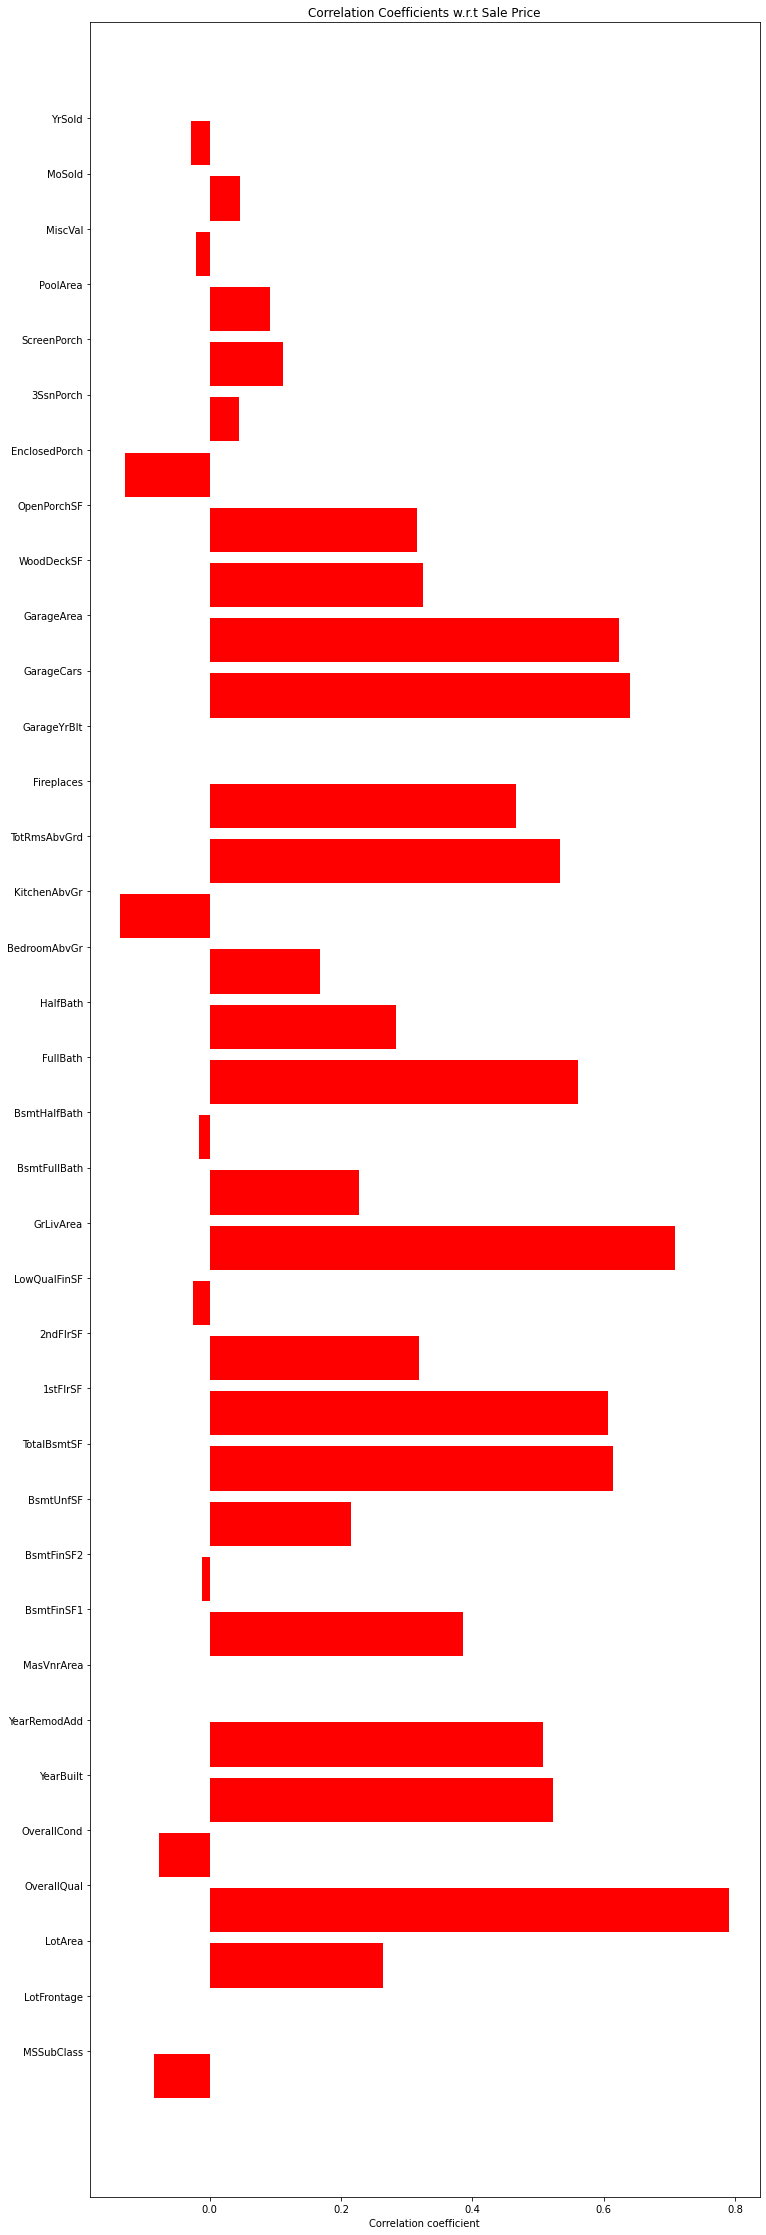

In [11]:
#plotting correlations
num_feat=houses.columns[houses.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(houses[col].values, houses.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [16]:
correlations=houses.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
14,"(GarageArea, GarageCars)",0.882475
2,"(GarageYrBlt, YearBuilt)",0.825667
5,"(GrLivArea, TotRmsAbvGrd)",0.825489
9,"(1stFlrSF, TotalBsmtSF)",0.819530
17,"(2ndFlrSF, GrLivArea)",0.687501
23,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
1,"(BsmtFinSF1, BsmtFullBath)",0.649212
18,"(GarageYrBlt, YearRemodAdd)",0.642277
21,"(FullBath, GrLivArea)",0.630012
11,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


This shows multicollinearity.
In regression, "multicollinearity" refers to features that are correlated with other features.  Multicollinearity occurs when your model includes multiple factors that are correlated not just to your target variable, but also to each other.

Problem:

Multicollinearity increases the standard errors of the coefficients.
That means, multicollinearity makes some variables statistically insignificant when they should be significant.

To avoid this we can do 3 things:

1. Completely remove those variables
2. Make new feature by adding them or by some other operation.
3. Use PCA, which will reduce feature set to small number of non-collinear features.

Reference:http://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis

**Heatmap**
-----------

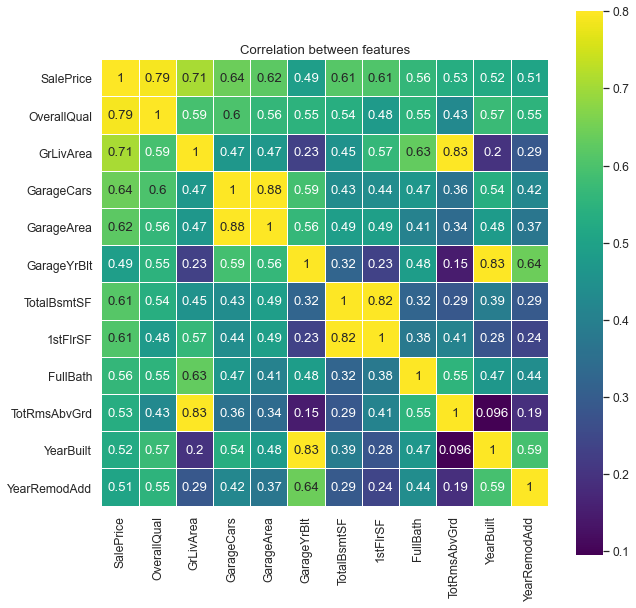

In [14]:
import seaborn as sns
corrMatrix=houses[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

As we saw above there are few feature which shows high multicollinearity from heatmap.
Lets focus on yellow squares on diagonal line and few on the sides.

SalePrice and OverallQual

GarageArea and GarageCars

TotalBsmtSF and 1stFlrSF

GrLiveArea and TotRmsAbvGrd

YearBulit and GarageYrBlt

We have to create a single feature from them before we use them as predictors.


*Pivotal Features*
------------------------

In [18]:
houses[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [19]:
houses[['GarageCars','SalePrice']].groupby(['GarageCars'],
as_index=False).mean().sort_values(by='GarageCars', ascending=False)

,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


In [20]:
houses[['Fireplaces','SalePrice']].groupby(['Fireplaces'],
as_index=False).mean().sort_values(by='Fireplaces', ascending=False)

,Fireplaces,SalePrice
3,3,252000.000000
2,2,240588.539130
1,1,211843.909231
0,0,141331.482609


*Visualising Target variable*
-----------------

*Univariate Analysis*
--------------------

How 1 single variable is distributed in numeric range.
What is statistical summary of it.
Is it positively skewed or negatively.

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


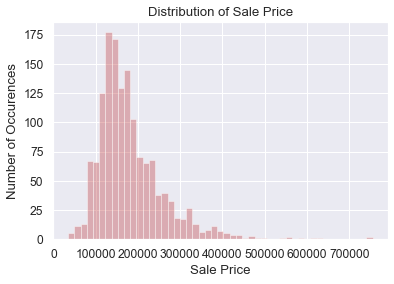

In [21]:
sns.distplot(houses['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");

Prices are right skewed and  graph shows some peakedness.

In [22]:
#skewness  

houses['SalePrice'].skew()

1.8828757597682129

In [23]:
#kurtosis

houses['SalePrice'].kurt()


6.536281860064529

C:\Users\shyam\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


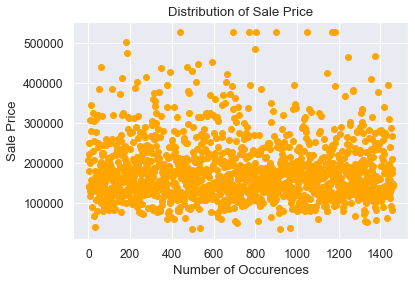

In [25]:
#there are some outliers.lets remove them.
upperlimit = np.percentile(houses.SalePrice.values, 99.5)
houses['SalePrice'].iloc[houses['SalePrice']>upperlimit] = upperlimit

plt.scatter(range(houses.shape[0]), houses["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price");

**Missing Value Imputation**
====================


Missing values in the training data set can affect prediction or classification of a model negatively.

Also some machine learning algorithms can't accept missing data eg. SVM.

But filling missing values with mean/median/mode or using another predictive model to predict missing values is also a prediction which may not be 100% accurate, instead you can use models like Decision Trees and Random Forest which handle missing values very well.

Some of this part is based on this kernel:
https://www.kaggle.com/bisaria/house-prices-advanced-regression-techniques/handling-missing-data

In [26]:
#lets see if there are any columns with missing values 
null_columns=houses.columns[houses.isnull().any()]
houses[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

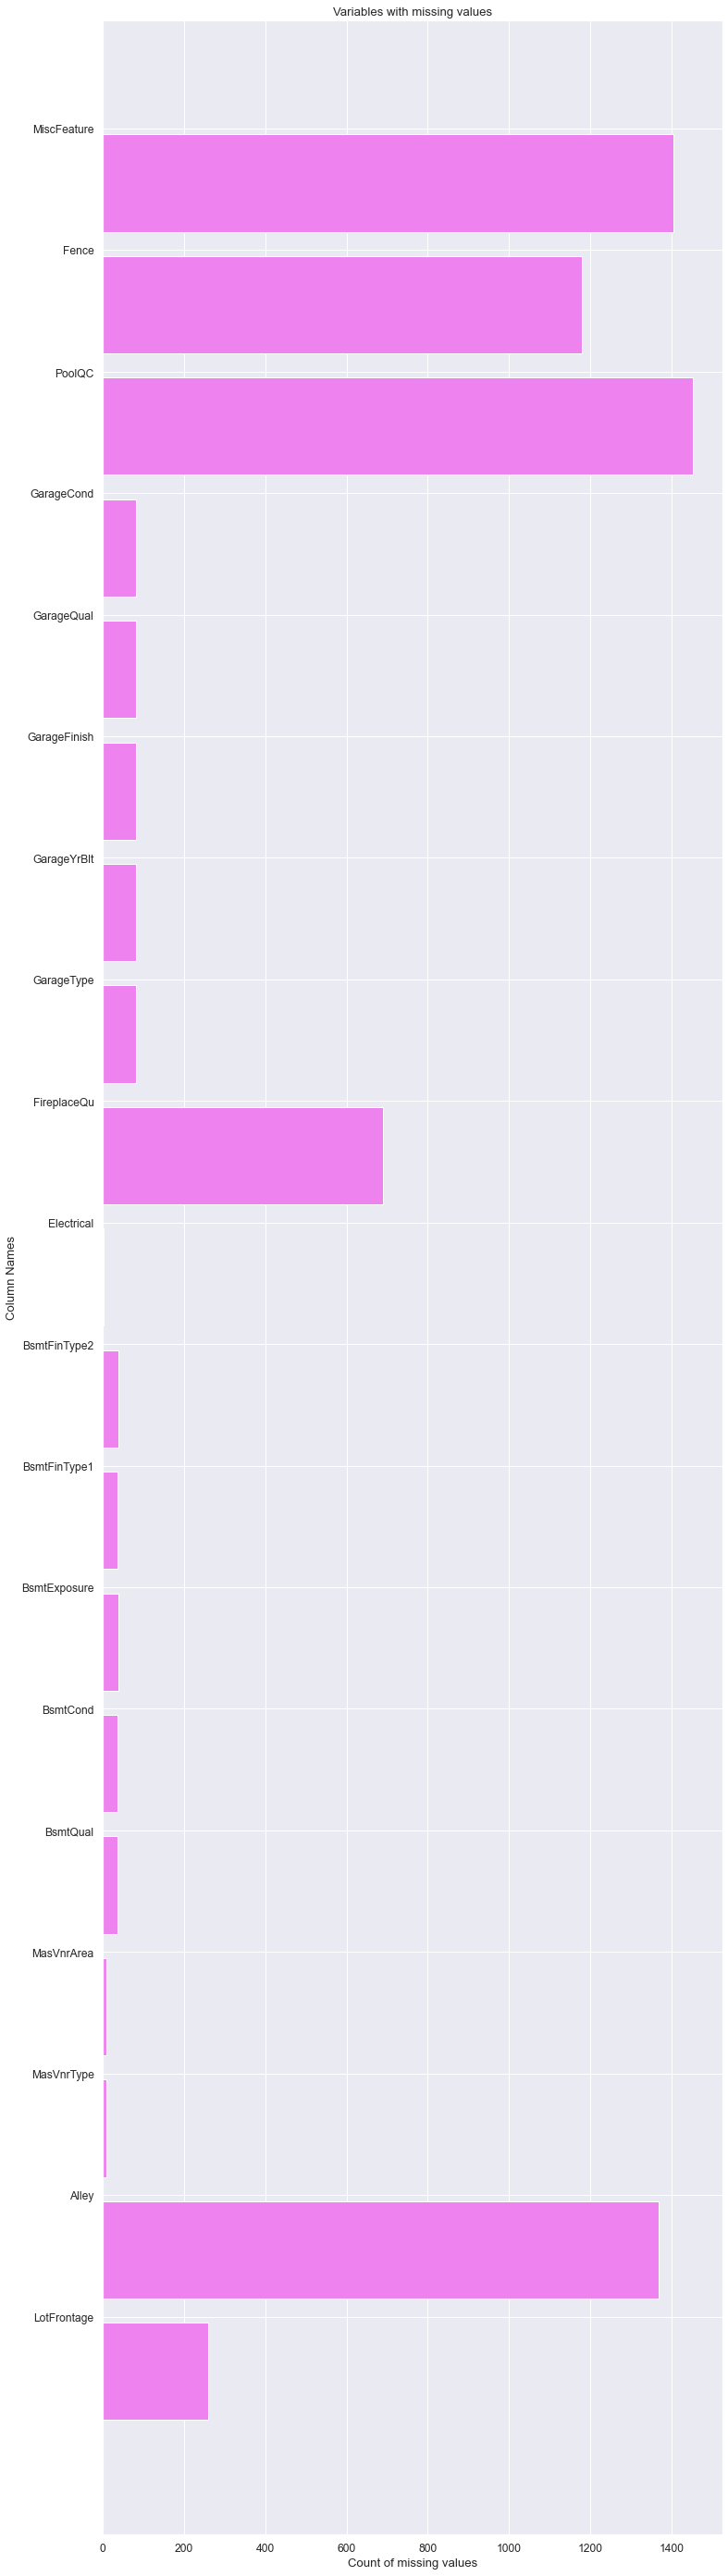

In [27]:
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(houses[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,50))
rects = ax.barh(ind, np.array(values), color='violet')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

*Multivariate Analysis*
--------------------

When we understand how 3 or more variables behave according to each other.

*LotFrontage*
-------------

We can see if there is some correlation between LotArea and LotFrontage

In [28]:
houses['LotFrontage'].corr(houses['LotArea'])

0.42609501877180816

This is not great, we will try some polynomial expressions like squareroot 

In [29]:
houses['SqrtLotArea']=np.sqrt(houses['LotArea'])
houses['LotFrontage'].corr(houses['SqrtLotArea'])

0.6020022167939364

0.60 looks good to go.

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


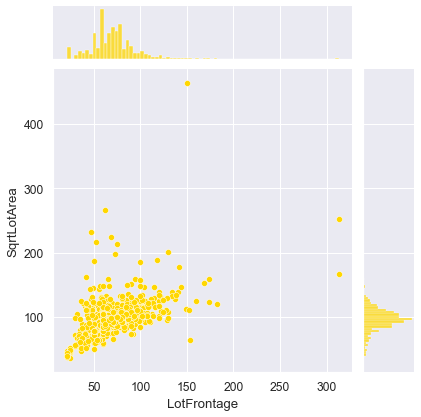

In [30]:
sns.jointplot(houses['LotFrontage'],houses['SqrtLotArea'],color='gold');

In [31]:
filter = houses['LotFrontage'].isnull()
houses.LotFrontage[filter]=houses.SqrtLotArea[filter]

<ipython-input-31-58c31bc083ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses.LotFrontage[filter]=houses.SqrtLotArea[filter]


*MasVnrType and MasVnrArea*
===========================

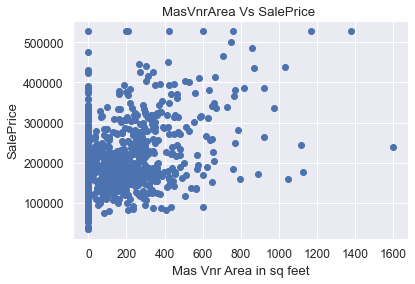

In [32]:
plt.scatter(houses["MasVnrArea"],houses["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet");

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


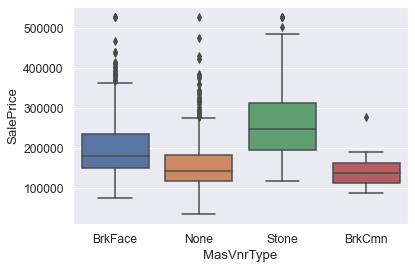

In [33]:
sns.boxplot("MasVnrType","SalePrice",data=houses);

In [34]:
houses["MasVnrType"] = houses["MasVnrType"].fillna('None')
houses["MasVnrArea"] = houses["MasVnrArea"].fillna(0.0)

*Bivariate Analysis*
--------------------

When we try to figure out how 2 parameters in dataset are related to each other. in the sense when one decreases, other also decreases or when one increases other also increases i.e Positive Correlation 

And  when one increases , other decreases or vice versa i .e Negative correlation.

*Electrical*
------------

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


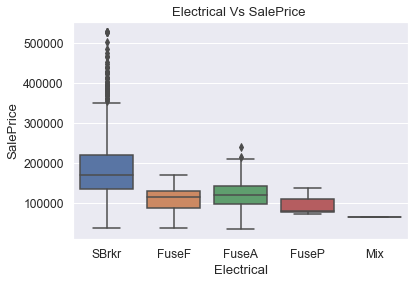

In [35]:
sns.boxplot("Electrical","SalePrice",data=houses)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical");

In [36]:
#We can replace missing values with most frequent ones.
houses["Electrical"] = houses["Electrical"].fillna('SBrkr')

*Alley*
-------

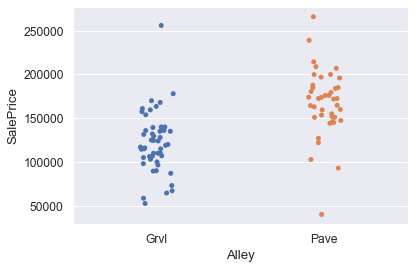

In [37]:
sns.stripplot(x=houses["Alley"], y=houses["SalePrice"],jitter=True);

All missing value indicate that particular house doesn't have an alley access.we can replace it with 'None'.

In [38]:
houses["Alley"] = houses["Alley"].fillna('None')

*Basement Features*
-------------------

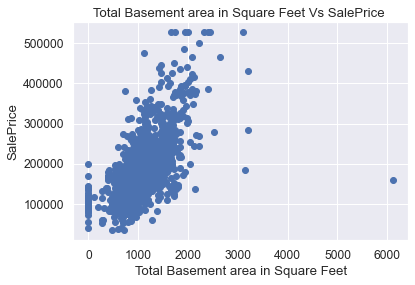

In [39]:
plt.scatter(houses["TotalBsmtSF"],houses["SalePrice"])
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");

C:\Users\shyam\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


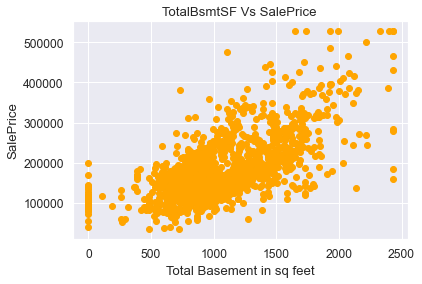

In [42]:
#there are few outliers in total basement area lets remove them
upperlimit = np.percentile(houses.TotalBsmtSF.values, 99.5)
houses['TotalBsmtSF'].iloc[houses['TotalBsmtSF']>upperlimit] = upperlimit

plt.scatter(houses.TotalBsmtSF, houses["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

In [43]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
houses[basement_cols][houses['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


All categorical variables contains NAN whereas continuous ones have 0.
So that means there is no basement for those houses.
we can replace it with 'None'.

In [44]:
for col in basement_cols:
    if 'FinSF'not in col:
        houses[col] = houses[col].fillna('None')

*Fireplaces*
------------

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


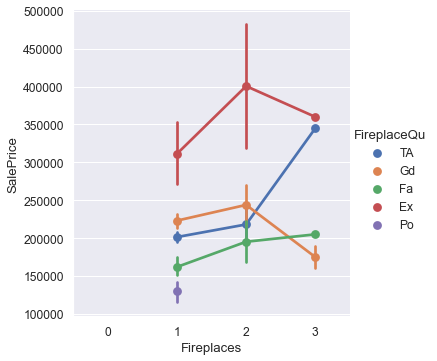

In [45]:
sns.factorplot("Fireplaces","SalePrice",data=houses,hue="FireplaceQu");

Having 2 fireplaces increases house price and fireplace of Excellent quality is a big plus. 

In [46]:
#If fireplace quality is missing that means that house doesn't have a fireplace
houses["FireplaceQu"] = houses["FireplaceQu"].fillna('None')
pd.crosstab(houses.Fireplaces, houses.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,690,0,0
1,19,28,324,0,20,259
2,4,4,54,0,0,53
3,1,1,2,0,0,1


*Garages*
---------

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


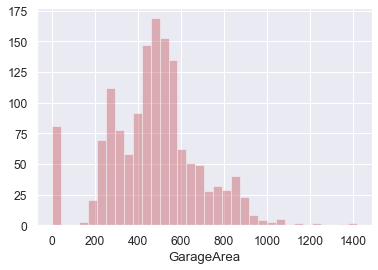

In [47]:
sns.distplot(houses["GarageArea"],color='r', kde=False);

C:\Users\shyam\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


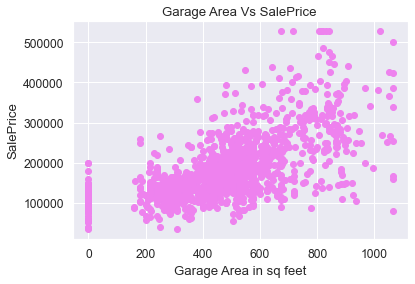

In [50]:
#GarageArea has got some outliers lets remove them.
upperlimit = np.percentile(houses.GarageArea.values, 99.5)
houses['GarageArea'].iloc[houses['GarageArea']>upperlimit] = upperlimit

plt.scatter(houses.GarageArea, houses["SalePrice"].values,color='violet')
plt.title("Garage Area Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Garage Area in sq feet");

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


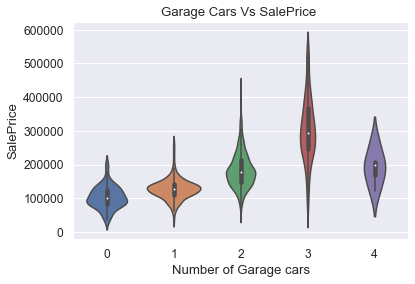

In [51]:
sns.violinplot(houses["GarageCars"],houses["SalePrice"])
plt.title("Garage Cars Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Number of Garage cars");

In [52]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
houses[garage_cols][houses['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0.0
48,NaN,NaN,NaN,NaN,NaN,0,0.0
78,NaN,NaN,NaN,NaN,NaN,0,0.0
88,NaN,NaN,NaN,NaN,NaN,0,0.0
89,NaN,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0.0
1407,NaN,NaN,NaN,NaN,NaN,0,0.0
1449,NaN,NaN,NaN,NaN,NaN,0,0.0
1450,NaN,NaN,NaN,NaN,NaN,0,0.0


All garage related features are missing values in same rows.
that means we can replace categorical variables with None and continuous ones with 0.

In [53]:
for col in garage_cols:
    if houses[col].dtype==np.object:
        houses[col] = houses[col].fillna('None')
    else:
        houses[col] = houses[col].fillna(0)

<ipython-input-53-827ec8296586>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if houses[col].dtype==np.object:


*Pool*
-----------------------

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


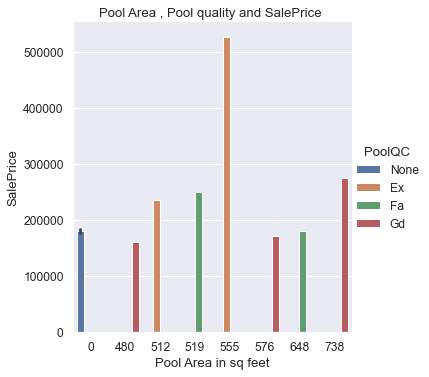

In [54]:
#If PoolArea is 0, that means that house doesn't have a pool.
#So we can replace PoolQuality with None.
houses["PoolQC"] = houses["PoolQC"].fillna('None')
sns.factorplot("PoolArea","SalePrice",data=houses,hue="PoolQC",kind='bar')
plt.title("Pool Area , Pool quality and SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet");

*Fence*
-----------------------

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


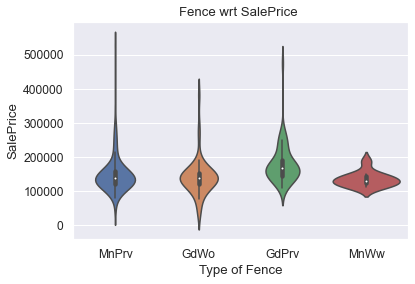

In [55]:
sns.violinplot(houses["Fence"],houses["SalePrice"])
plt.title("Fence wrt SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Fence");

Fence has got 1179 null values.
We can safely assume that those houses doesn't have a Fence and replace those values with None.

In [56]:
houses["Fence"] = houses["Fence"].fillna('None')

*MiscFeature*
-----------------------

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


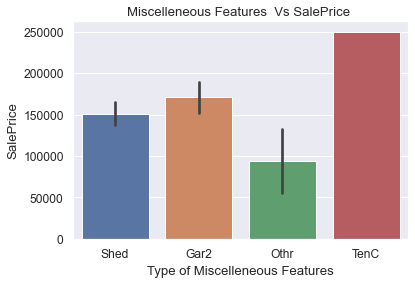

In [57]:
sns.barplot(houses["MiscFeature"],houses["SalePrice"])
plt.title("Miscelleneous Features  Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Miscelleneous Features");

In [58]:
#Some houses don't have miscellaneous features like shed, Tennis court etc..
houses["MiscFeature"] = houses["MiscFeature"].fillna('None')

In [59]:
#Let's confirm that we have removed all missing values
houses[null_columns].isnull().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

**Visualizations**
==================

*MSZoning*
-----------

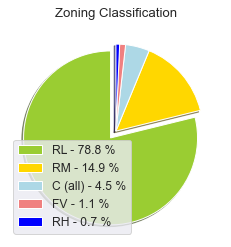

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


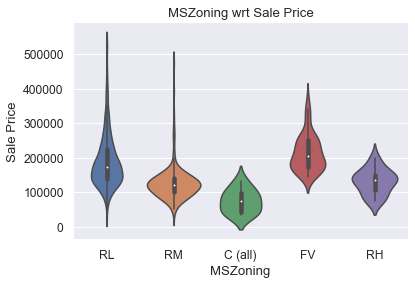

In [60]:

labels = houses["MSZoning"].unique()
sizes = houses["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()



sns.violinplot(houses.MSZoning,houses["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

*1st Floor in square feet*
--------------------------

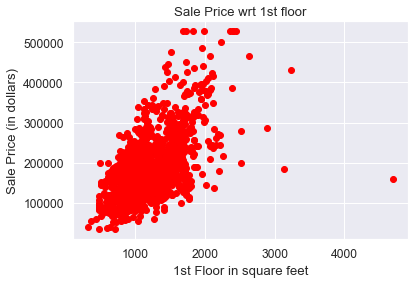

In [61]:
plt.scatter(houses["1stFlrSF"],houses.SalePrice, color='red')
plt.title("Sale Price wrt 1st floor")
plt.ylabel('Sale Price (in dollars)')
plt.xlabel("1st Floor in square feet");

*Ground Living Area w.r.t SalePrice*
--------------------

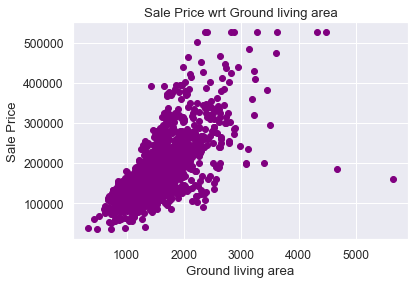

In [62]:
plt.scatter( houses["GrLivArea"],houses["SalePrice"],color='purple')
plt.title("Sale Price wrt Ground living area")
plt.ylabel('Sale Price')
plt.xlabel("Ground living area");

*SalePrice per square foot*
--------------------

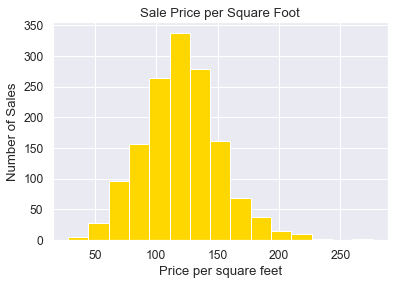

In [63]:
houses['SalePriceSF'] = houses['SalePrice']/houses['GrLivArea']
plt.hist(houses['SalePriceSF'], bins=15,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

In [64]:
#Average Sale Price per square feet 
print("$",houses.SalePriceSF.mean())

$ 120.42996589363497


*Garage Area*
-------------

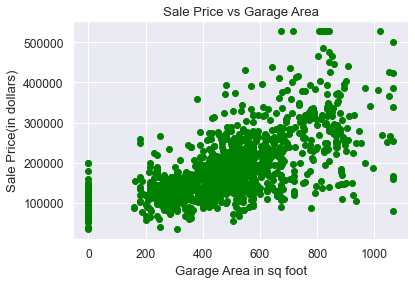

In [65]:
plt.scatter(houses["GarageArea"],houses.SalePrice, color='green')
plt.title("Sale Price vs Garage Area")
plt.ylabel('Sale Price(in dollars)')
plt.xlabel("Garage Area in sq foot");

*Building , remodelling years and age of house*
----------------------------------------

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


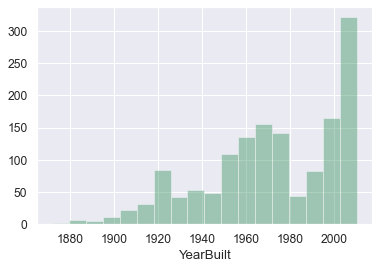

In [66]:
sns.distplot(houses["YearBuilt"],color='seagreen', kde=False);

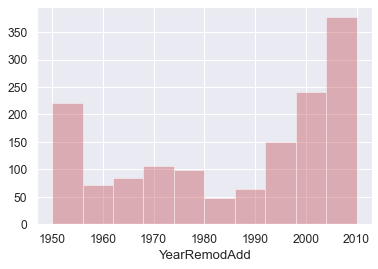

In [67]:
sns.distplot(houses["YearRemodAdd"].astype(int),color='r', kde=False);


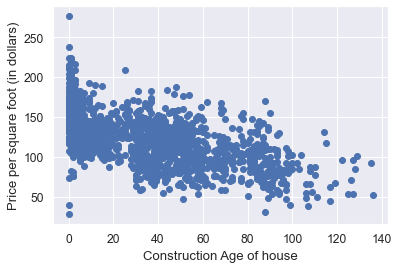

In [68]:
houses['ConstructionAge'] = houses['YrSold'] - houses['YearBuilt']
plt.scatter(houses['ConstructionAge'], houses['SalePriceSF'])
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");

Price of house goes down with its age.

*Heating and AC arrangements*
-----------------------------

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


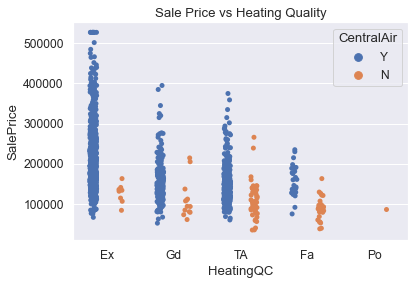

In [69]:
sns.stripplot(x="HeatingQC", y="SalePrice",data=houses,hue='CentralAir',jitter=True,split=True)
plt.title("Sale Price vs Heating Quality");

Having AC definitely escalates price of house.

*Bathrooms in house*
--------------------------

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


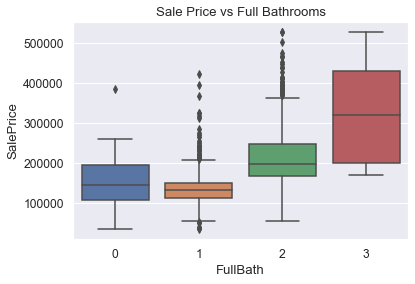

In [70]:
sns.boxplot(houses["FullBath"],houses["SalePrice"])
plt.title("Sale Price vs Full Bathrooms");

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


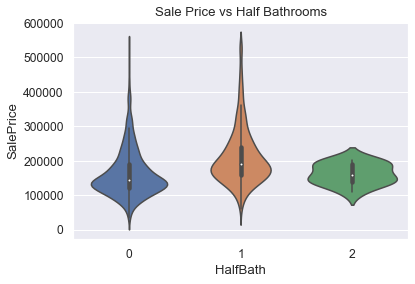

In [71]:
sns.violinplot( houses["HalfBath"],houses["SalePrice"])
plt.title("Sale Price vs Half Bathrooms");

*Total rooms above grade*
-------------------------

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


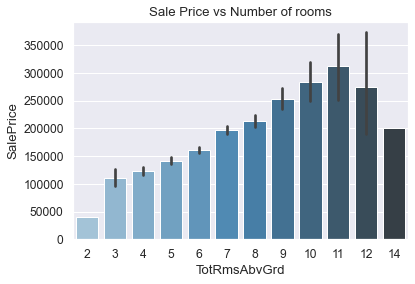

In [72]:
sns.barplot(houses["TotRmsAbvGrd"],houses["SalePrice"],palette="Blues_d")
plt.title("Sale Price vs Number of rooms");

*Kitchen Quality*
=================

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


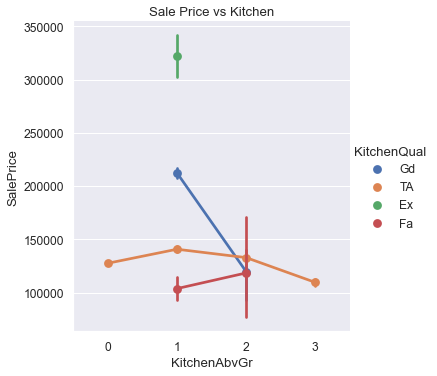

In [73]:
sns.factorplot("KitchenAbvGr","SalePrice",data=houses,hue="KitchenQual")
plt.title("Sale Price vs Kitchen");

Having 1 Kitchen of Excellent quality hikes house price like anything.

*Neighbourhood*
--------------

C:\Users\shyam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


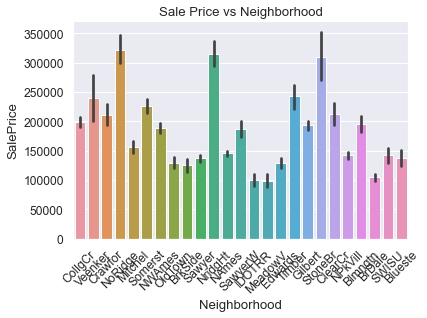

In [74]:
plt.xticks(rotation=45) 
sns.barplot(houses["Neighborhood"],houses["SalePrice"])
plt.title("Sale Price vs Neighborhood");

*Overall Quality*
-----------------

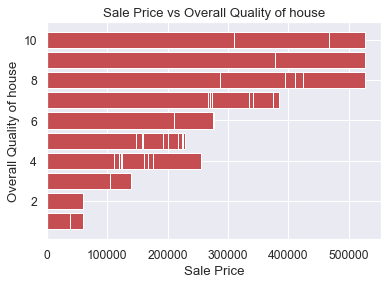

In [75]:
plt.barh(houses["OverallQual"],width=houses["SalePrice"],color="r")
plt.title("Sale Price vs Overall Quality of house")
plt.ylabel("Overall Quality of house")
plt.xlabel("Sale Price");

*2nd Floor with SalePrice*
--------------------------

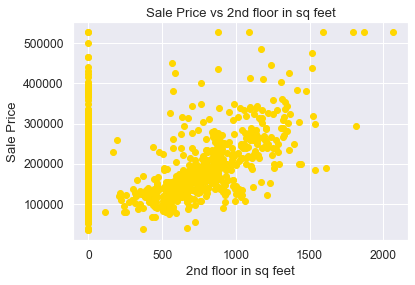

In [76]:
plt.scatter(houses["2ndFlrSF"],houses["SalePrice"],color="gold")
plt.title("Sale Price vs 2nd floor in sq feet");
plt.xlabel("2nd floor in sq feet")
plt.ylabel("Sale Price");

*Street*
--------

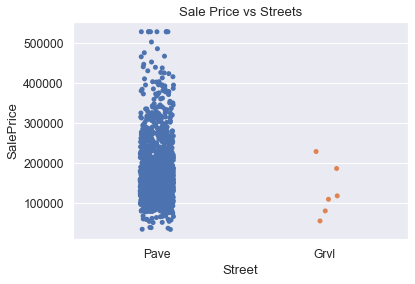

In [77]:
#most streets are paved lets visulalize it
sns.stripplot(x=houses["Street"], y=houses["SalePrice"],jitter=True)
plt.title("Sale Price vs Streets");